### 군집화(Clustering)
: 비지도학습으로 정답 없이, 특징만 가지고 데이터로 모델을 구현 

##### 키와 몸무게로 학생들을 3그룹으로 분류

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [2]:
df = pd.read_csv("../Data/student_kmeans.csv")
df.head()

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68


### 데이터 시각화

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

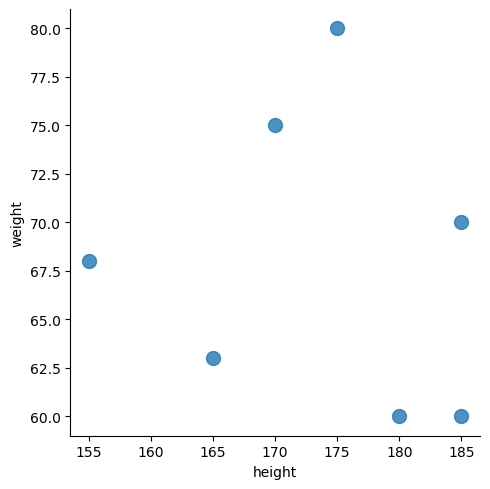

In [4]:
sns.lmplot(
    x='height',
    y='weight',
    data=df,
    fit_reg=False,
    scatter_kws={'s':100}
)
plt.show()

### k-Means 군집화

In [5]:
df.values

array([[185,  60],
       [180,  60],
       [185,  70],
       [165,  63],
       [155,  68],
       [170,  75],
       [175,  80]], dtype=int64)

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.values)

KMeans(n_clusters=3)

In [8]:
# 각 Cluster의 중심 위치
kmeans.cluster_centers_

array([[172.5       ,  77.5       ],
       [183.33333333,  63.33333333],
       [160.        ,  65.5       ]])

In [9]:
kmeans.labels_

array([1, 1, 1, 2, 2, 0, 0])

In [10]:
df['cluster_id'] = kmeans.labels_
df

,height,weight,cluster_id
0,185,60,1
1,180,60,1
2,185,70,1
3,165,63,2
4,155,68,2
5,170,75,0
6,175,80,0


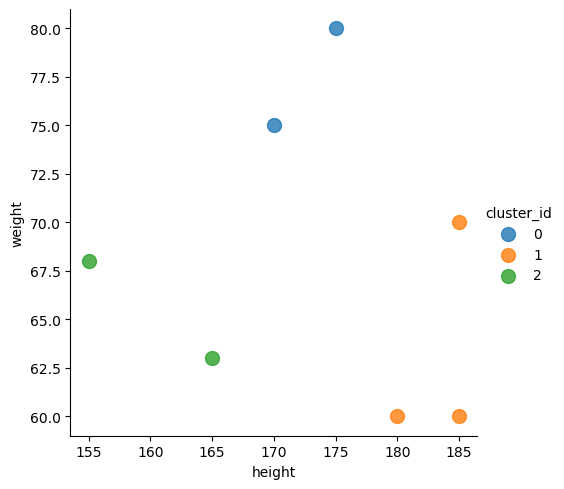

In [11]:
sns.lmplot(
    x='height',
    y='weight',
    data=df,
    fit_reg=False,
    scatter_kws={'s':100},
    hue='cluster_id'
)
plt.show()

---
### IRIS 군집화

In [12]:
iris = pd.read_csv("../Data/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
# Name을 숫자로 변환
iris['label'] = iris['Name'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1


In [26]:
# 정답을 제외한 DataSet
iris2 = iris.iloc[:,:4]
iris2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
# k-Means
kmeans = KMeans(n_clusters=3).fit(iris2.values)

In [28]:
# 중심점
kmeans.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [29]:
# 분류 Label
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [30]:
# 군집표시
iris['cluster_id'] = kmeans.labels_
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0


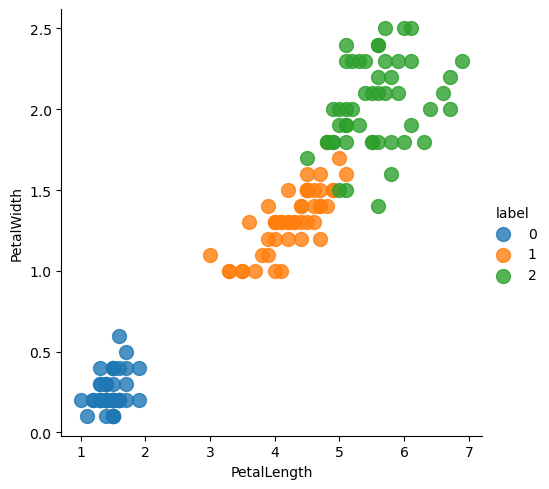

In [31]:
# label을 시각화
sns.lmplot(
    x='PetalLength',
    y='PetalWidth',
    data=iris,
    fit_reg=False,
    scatter_kws={'s':100},
    hue='label'
)

plt.show()

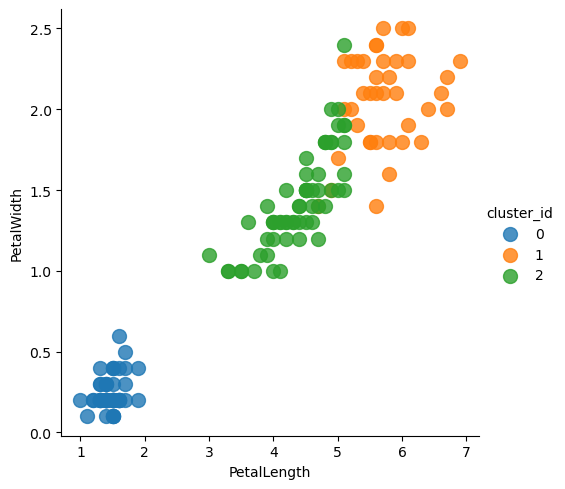

In [32]:
# label을 시각화
sns.lmplot(
    x='PetalLength',
    y='PetalWidth',
    data=iris,
    fit_reg=False,
    scatter_kws={'s':100},
    hue='cluster_id'
)

plt.show()

In [22]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(iris.label, iris.cluster_id)

0.0

##### 1 -> 2, 2 -> 1 ==> 1 -> 3, 2 -> 1, 3-> 2

In [33]:
iris.loc[iris['cluster_id']==1,'cluster_id'] = 3
iris.loc[iris['cluster_id']==2,'cluster_id'] = 1
iris.loc[iris['cluster_id']==3,'cluster_id'] = 2

In [34]:
accuracy_score(iris.label, iris.cluster_id)

0.8866666666666667